In [2]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# load the training dataset
penguins = pd.read_csv(r'penguins.csv')

# Display a random sample of 10 observations
penguins.head(10)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181,3750,0
1,39.5,17.4,186,3800,0
2,40.3,18.0,195,3250,0
3,36.7,19.3,193,3450,0
4,39.3,20.6,190,3650,0
5,38.9,17.8,181,3625,0
6,39.2,19.6,195,4675,0
7,34.1,18.1,193,3475,0
8,42.0,20.2,190,4250,0
9,37.8,17.1,186,3300,0


In [4]:
penguins.Species.unique()

array([0, 1, 2], dtype=int64)

In [5]:
a=penguins[penguins.Species==0]
b=penguins[penguins.Species==1]
c=penguins[penguins.Species==2]


In [6]:
penguins.shape

(342, 5)

In [7]:
a.shape

(151, 5)

In [8]:
b.shape

(123, 5)

In [9]:
c.shape

(68, 5)

In [10]:
a.Species='Amelie'
b.Species='Gentoo'
c.Species='Chinstrap'

C:\Users\admin\AppData\Local\Temp\ipykernel_1028\2457986192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.Species='Amelie'
C:\Users\admin\AppData\Local\Temp\ipykernel_1028\2457986192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.Species='Gentoo'
C:\Users\admin\AppData\Local\Temp\ipykernel_1028\2457986192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [11]:
penguins1=pd.concat([a,b,c])

In [12]:
penguins1.shape

(342, 5)

In [13]:
penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'

In [14]:
# Separate features and labels
penguins_X, penguins_y = penguins1[penguin_features].values, penguins1[penguin_label].values

In [15]:
penguins_X.shape

(342, 4)

In [16]:
# Split data 70%-30% into training set and test set
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=2,
                                                                                    stratify=penguins_y
                                                                                   )

print ('Training Set: %d, Test Set: %d \n' % (x_penguin_train.size, x_penguin_test.size))

Training Set: 956, Test Set: 412 



In [17]:
x_penguin_train.shape

(239, 4)

In [18]:
x_penguin_test.shape

(103, 4)

In [19]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [20]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  ['Amelie' 'Amelie' 'Amelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Amelie' 'Gentoo' 'Amelie' 'Gentoo' 'Gentoo' 'Amelie']
Actual labels   :  ['Amelie' 'Amelie' 'Amelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Amelie' 'Gentoo' 'Amelie' 'Gentoo' 'Gentoo' 'Amelie']


In [21]:
from sklearn. metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

      Amelie       0.98      0.98      0.98        45
   Chinstrap       1.00      0.95      0.98        21
      Gentoo       0.97      1.00      0.99        37

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9838206627680313
Overall Recall: 0.9767195767195767


In [23]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 1 20  0]
 [ 0  0 37]]


In [24]:
penguin_classes=penguins1.Species.unique()

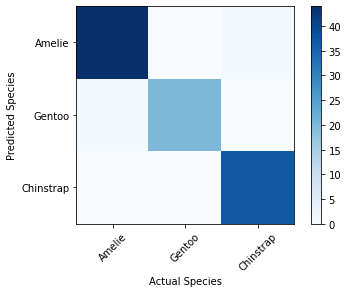

In [25]:
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Actual Species")
plt.ylabel("Predicted Species")
plt.show()